In [1]:
# Importing standard packages for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
credit_df = pd.read_csv('credit_risk_dataset.csv')
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 50)

In [3]:
credit_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [4]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
# Summary statistics for numerical variables
credit_df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [6]:
# Summary statistics for categorical variables
credit_df.describe(include='O')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


## Data Cleaning

In [7]:
# Checking for outliers

credit_df.loc[credit_df['person_age'] > 100].index

Int64Index([81, 183, 575, 747, 32297], dtype='int64')

In [8]:
credit_df.loc[credit_df['person_emp_length'] > 100].index

Int64Index([0, 210], dtype='int64')

In [9]:
# Removing records where age or employment length is over 100

outliers = credit_df.loc[(credit_df['person_age'] > 100) | (credit_df['person_emp_length'] > 100)].index

credit_df.drop(outliers, inplace=True)

In [10]:
credit_df.shape

(32574, 12)

In [11]:
#Checking for duplicate rows

credit_df.duplicated().sum()

165

In [12]:
credit_df.loc[credit_df.duplicated()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.42,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.90,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.88,0,0.15,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12
32259,39,40000,OWN,4.0,VENTURE,B,1000,10.37,0,0.03,N,16


In [13]:
credit_df.drop_duplicates(keep='first', inplace=True)

## Exploratory Data Analysis

In [14]:
# Summary statistics for numerical variables

credit_df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32409.000000,3.240900e+04,31522.000000,32409.000000,29315.000000,32409.000000,32409.000000,32409.000000
mean,27.730754,6.589428e+04,4.782850,9592.486655,11.017099,0.218705,0.170248,5.811194
std,6.210445,5.251787e+04,4.037343,6320.885127,3.241718,0.413374,0.106785,4.057899
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12250.000000,13.470000,0.000000,0.230000,8.000000
max,94.000000,2.039784e+06,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [15]:
# Summary statistics for categorical variables

credit_df.describe(include='O')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32409,32409,32409,32409
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16374,6409,10702,26680


In [119]:
numerical_cols = credit_df.select_dtypes(include='number').columns.tolist()
numerical_cols

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [114]:
categorical_cols = credit_df.select_dtypes(include='object').columns.tolist()
categorical_cols

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

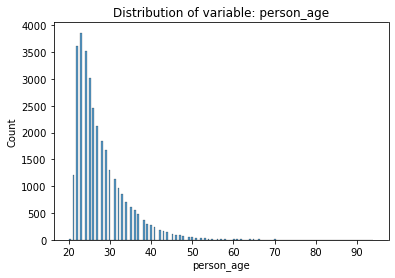

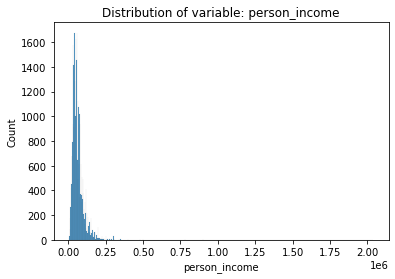

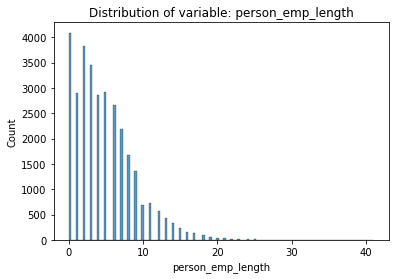

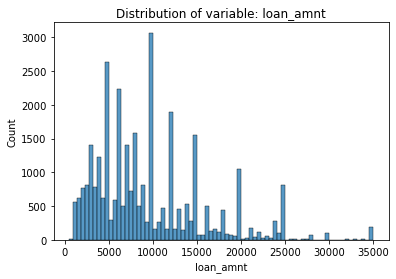

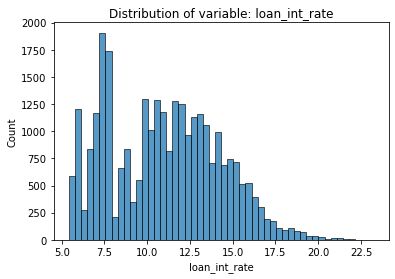

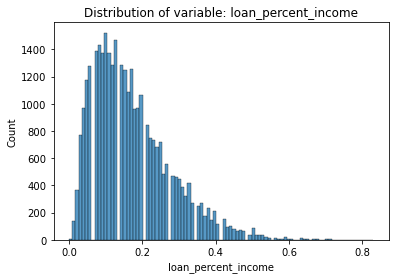

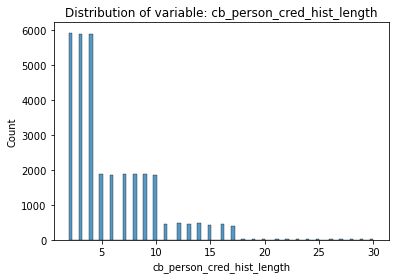

In [137]:
# Plotting the distribution of numerical variables

for col in numerical_cols:
    sns.histplot(credit_df, x=col)
    plt.title(f'Distribution of variable: {col}')
    plt.show()

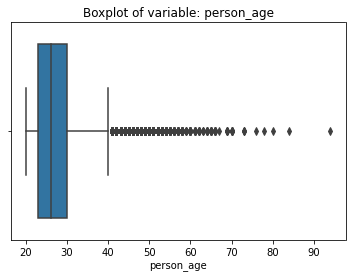

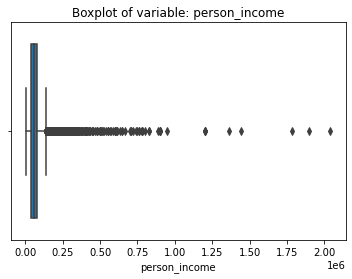

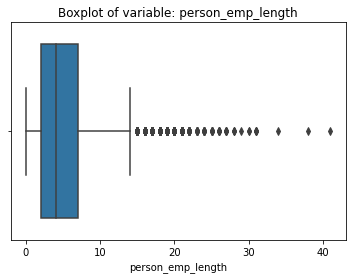

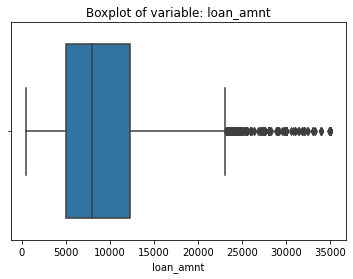

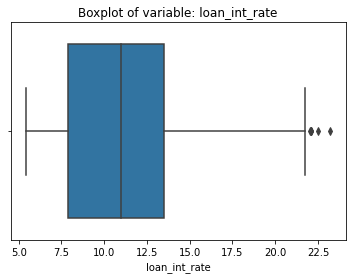

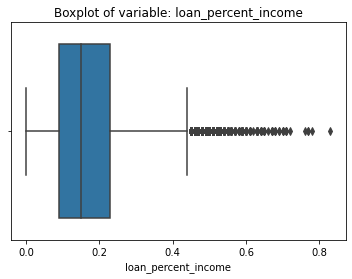

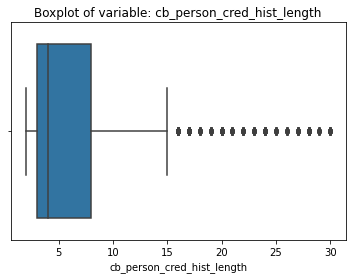

In [138]:
for col in numerical_cols:
    sns.boxplot(data=credit_df, x=col)
    plt.title(f'Boxplot of variable: {col}')
    plt.show()

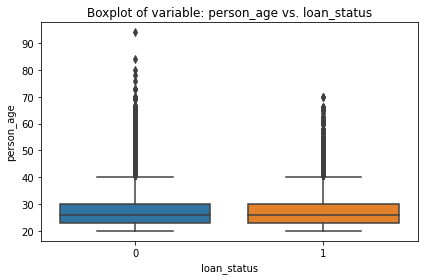

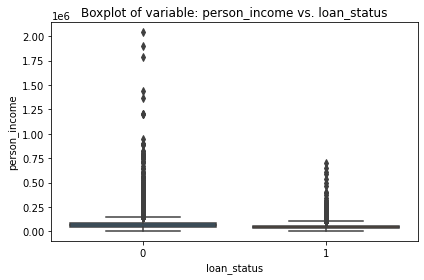

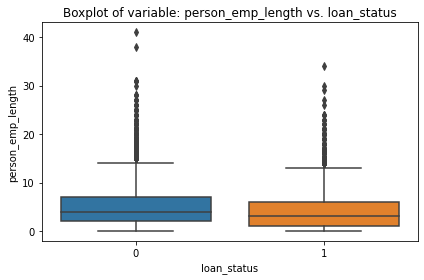

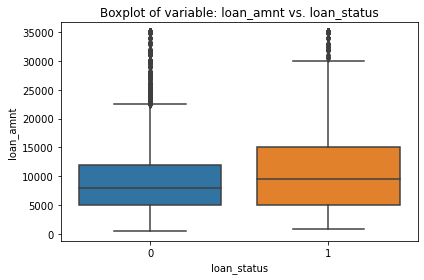

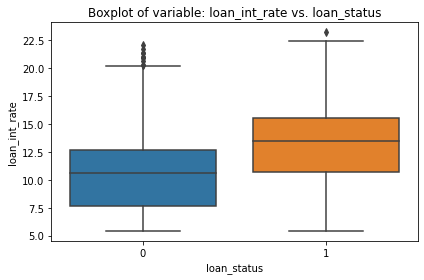

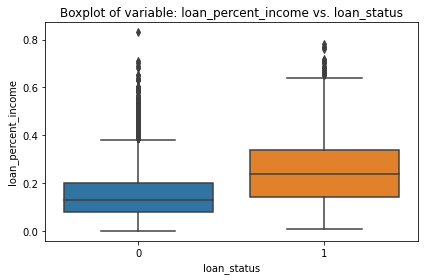

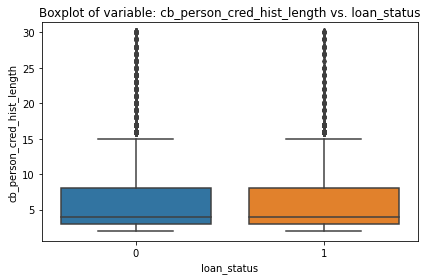

In [139]:
# Analyzing numerical variables with target

for col in numerical_cols:
    sns.boxplot(data=credit_df, x=credit_df['loan_status'].astype('category'), y=col)
    plt.title(f'Boxplot of variable: {col} vs. loan_status')
    plt.tight_layout()
    plt.show()

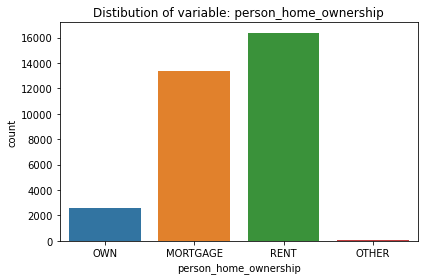

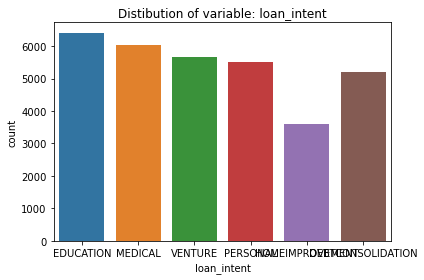

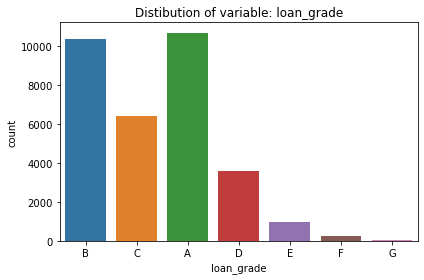

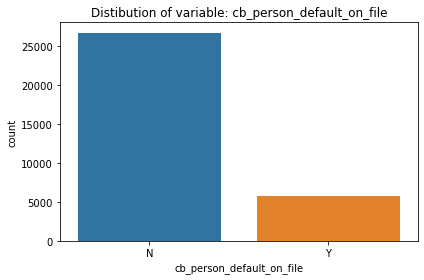

In [140]:
# Plotting the distribution of categorical variables

for col in categorical_cols:
    sns.countplot(data=credit_df, x=col)
    plt.title(f'Distibution of variable: {col}')
    plt.tight_layout()
    plt.show()

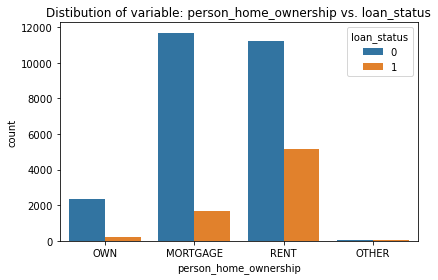

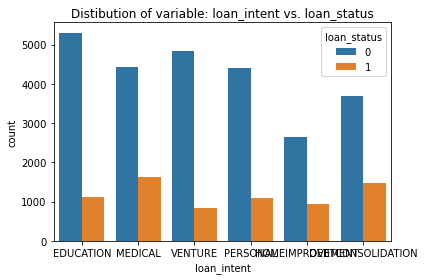

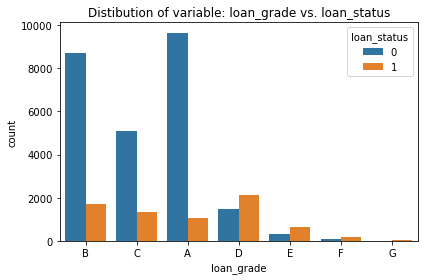

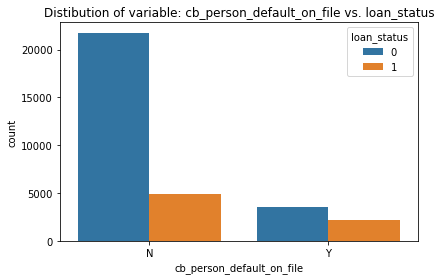

In [141]:
# Analyzing categorical variables with target

for col in categorical_cols:
    sns.countplot(data=credit_df, x=col, hue='loan_status')
    plt.title(f'Distibution of variable: {col} vs. loan_status')
    plt.tight_layout()
    plt.show()

<AxesSubplot:title={'center':'Correlation Among Numerical Features'}>

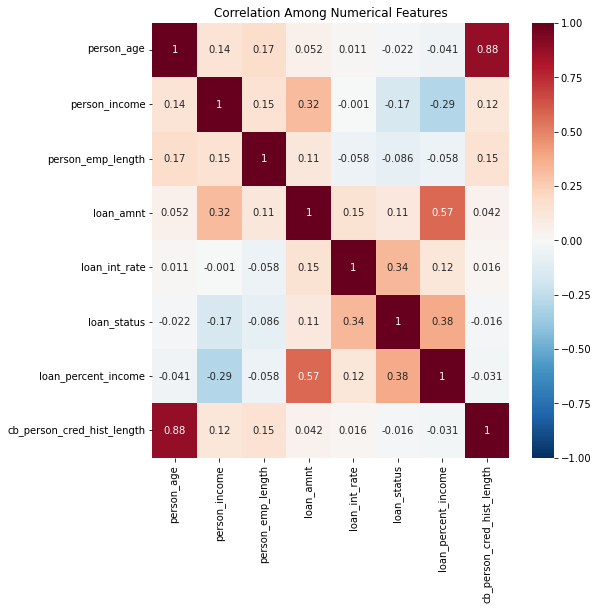

In [118]:
# Checking for correlation among numerical variables

plt.figure(figsize=(8,8))
plt.title('Correlation Among Numerical Features')
corr = credit_df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='RdBu_r', vmax=1, vmin=-1)

## Exploratory Data Analysis: Summary of Results


A typical loan in the dataset is an A or B-grade loan for 8000 with 11% interest that is used for education and represents 15% of the borrower’s income.

A typical borrower in the dataset is 26 years old, rents, has been employed for 4 years and has a good credit history of 4 years.

Numerical Variables
1. Age is a weak predictor of financial capability. Loan default rates do not differ for borrowers aged between 20 and 70. However, senior borrowers (those who are above 70) typically perform well with loan repayment.
2. Borrowers who defaulted on their loans are earning below 80,000. Those with salaries above 80,000 have capacity to pay their loans and are less likely to default.
3. Less experienced borrowers are more likely to default than those who have worked for a longer period of time.
4. Loans with larger amounts and higher interest rates have higher default rates.
5. Loans that consume a larger portion of the borrower's income are much more likely to go bad.
6. Length of credit history do not distinguish good and bad borrowers.
7. Loan interest rate and loan percent income appeared to be the most correlated with loan status.

Categorical variables
1. Renters are more likely to default on their loans than homeowners, whether or not they have a mortgage.
2. Loans taken out for debt consolidation or medical expenses have a higher default rate than loans taken out for other reasons.
3. Higher grade loans A to C are less likely to default than loans of lesser quality (grades D to F).
4. People with a poor credit history have a higher likelihood of defaulting in the future.


## Data Preprocessing 

In [25]:
# Importing sklearn modules for data preprocessing

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [26]:
# Separating the features and target variable
X = credit_df.drop(columns='loan_status')
y = credit_df['loan_status']

In [27]:
# Splitting the data into train and test sets before data processing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
3122,22,35500,MORTGAGE,0.0,EDUCATION,C,4000,12.53,0.11,N,2
22244,30,54000,MORTGAGE,13.0,MEDICAL,A,10000,7.90,0.19,N,10
12657,25,66300,MORTGAGE,9.0,MEDICAL,A,1700,6.76,0.02,N,4
10865,26,45000,RENT,2.0,PERSONAL,C,10000,NaN,0.22,N,3
1385,26,38000,RENT,6.0,PERSONAL,C,1000,15.27,0.03,Y,3


In [136]:
# Define numerical and categorical columns

numerical_cols = X_train.select_dtypes('number').columns.tolist()
print(f'Numerical columns are: {numerical_cols}\n')

categorical_cols = X_train.select_dtypes('object').columns.tolist()
print(f'Categorical columns are: {categorical_cols}')

Numerical columns are: ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

Categorical columns are: ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [30]:
# Define numerical pipeline
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define categorical pipeline
cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False))
])

# Combine numerical and categorical pipelines
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, numerical_cols),
    ('cat', cat_transformer, categorical_cols)
#     ('cat_ord', cat_ord_transformer, categorical_ordinal_cols)
])

# Fit column transformer to training data

preprocessor.fit(X_train)

# Prepare column names

cat_columns = preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(categorical_cols)
columns = np.append(cat_columns, numerical_cols)

In [31]:
columns

array(['person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_B',
       'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F',
       'loan_grade_G', 'cb_person_default_on_file_Y', 'person_age',
       'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'cb_person_cred_hist_length'], dtype=object)

In [32]:
# Inspect training data before and after
print('TRAINING DATA BEFORE TRANSFORMATION:')
X_train

TRAINING DATA BEFORE TRANSFORMATION:


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
3122,22,35500,MORTGAGE,0.0,EDUCATION,C,4000,12.53,0.11,N,2
22244,30,54000,MORTGAGE,13.0,MEDICAL,A,10000,7.90,0.19,N,10
12657,25,66300,MORTGAGE,9.0,MEDICAL,A,1700,6.76,0.02,N,4
10865,26,45000,RENT,2.0,PERSONAL,C,10000,NaN,0.22,N,3
1385,26,38000,RENT,6.0,PERSONAL,C,1000,15.27,0.03,Y,3
...,...,...,...,...,...,...,...,...,...,...,...
13129,22,88512,MORTGAGE,6.0,PERSONAL,A,3000,5.79,0.03,N,3
19776,28,36000,MORTGAGE,12.0,MEDICAL,C,1925,15.23,0.05,Y,8
9851,22,40000,RENT,2.0,EDUCATION,B,9000,10.59,0.23,N,4
10805,25,42000,RENT,5.0,EDUCATION,C,10000,12.99,0.24,Y,2


In [33]:
X_train_transformed = pd.DataFrame(preprocessor.transform(X_train), columns=columns)
print('TRAINING DATA AFTER TRANSFORMATION:')
X_train_transformed

TRAINING DATA AFTER TRANSFORMATION:


,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,...,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,-0.920617,-0.569850,-1.195606,-0.882938,0.497730,-0.564130,-0.937949,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.362455,-0.225511,2.067841,0.062032,-1.006094,0.183440,1.027297,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.439465,0.003429,1.063704,-1.245176,-1.376366,-1.405146,-0.446637,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.279081,-0.393027,-0.693537,0.062032,-0.002462,0.463778,-0.692293,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.279081,-0.523318,0.310600,-1.355423,1.387683,-1.311700,-0.692293,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25922,-0.920617,0.416859,0.310600,-1.040433,-1.691422,-1.311700,-0.692293,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25923,0.041687,-0.560543,1.816807,-1.209740,1.374691,-1.124808,0.535986,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
25924,-0.920617,-0.486092,-0.693537,-0.095463,-0.132382,0.557225,-0.446637,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25925,-0.439465,-0.448866,0.059566,0.062032,0.647138,0.650671,-0.937949,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [34]:
#Inspect testing data before and after
print('TESTING DATA BEFORE TRANSFORMATION:')
X_test

TESTING DATA BEFORE TRANSFORMATION:


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15505,23,74424,RENT,4.0,EDUCATION,C,15000,13.47,0.20,Y,3
29921,49,41869,MORTGAGE,8.0,EDUCATION,A,8000,7.14,0.19,N,15
30264,42,50000,MORTGAGE,5.0,EDUCATION,B,7000,NaN,0.14,N,12
22720,31,61000,RENT,3.0,MEDICAL,C,7500,NaN,0.12,Y,10
14559,24,110000,MORTGAGE,0.0,EDUCATION,A,5000,6.03,0.05,N,4
...,...,...,...,...,...,...,...,...,...,...,...
12693,24,64575,RENT,2.0,PERSONAL,A,12000,7.29,0.19,N,4
18808,31,42000,RENT,6.0,EDUCATION,D,1200,16.29,0.03,Y,5
11917,21,29004,RENT,5.0,MEDICAL,C,11000,14.22,0.38,N,2
10708,25,33000,RENT,0.0,VENTURE,C,10000,15.96,0.30,Y,3


In [35]:
X_test_transformed = pd.DataFrame(preprocessor.transform(X_test), columns=columns)
print('TESTING DATA AFTER TRANSFORMATION:')
X_test_transformed

TESTING DATA AFTER TRANSFORMATION:


,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,...,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,-0.760233,0.154640,-0.191469,0.849507,0.803042,0.276886,-0.692293,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,3.409752,-0.451304,0.812669,-0.252958,-1.252942,0.183440,2.255576,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.287064,-0.299962,0.059566,-0.410453,-0.002462,-0.283792,1.518609,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.522839,-0.095220,-0.442503,-0.331705,-0.002462,-0.470684,1.027297,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,-0.599849,0.816814,-1.195606,-0.725443,-1.613470,-1.124808,-0.446637,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6477,-0.599849,-0.028679,-0.693537,0.377022,-1.204222,0.183440,-0.446637,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6478,0.522839,-0.448866,0.310600,-1.323924,1.718979,-1.311700,-0.200982,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6479,-1.081001,-0.690760,0.059566,0.219527,1.046643,1.958918,-0.937949,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6480,-0.439465,-0.616382,-1.195606,0.062032,1.611795,1.211348,-0.692293,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### Selecting and Evaluating Model Performance

In [36]:
# Importing the classification models from sklearn

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [37]:
#Loop through each classification model and evaluate performance

accuracy_scores = []

def evaluate_performance(models):
    for model in models:
        print('Evaluating Performance for', model, '\n')
        model = model
        model.fit(X_train_transformed, y_train)
        y_pred = model.predict(X_test_transformed)
        
        accuracy = round(accuracy_score(y_test, y_pred), 3)
        accuracy_scores.append(accuracy)
        print('Accuracy:', accuracy)
        print('Precision:', round(precision_score(y_test, y_pred), 3))
        print('Recall:', round(recall_score(y_test, y_pred), 3))
        print('F1 Score:', round(f1_score(y_test, y_pred), 3))
    
        sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='Blues', fmt='g', cbar=False)
        plt.title("Confusion Matrix", fontsize=14, fontweight='bold')
        plt.show()
        print('\n')

Evaluating Performance for RandomForestClassifier() 

Accuracy: 0.935
Precision: 0.957
Recall: 0.735
F1 Score: 0.832


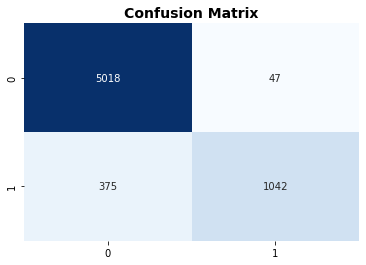



Evaluating Performance for DecisionTreeClassifier() 

Accuracy: 0.891
Precision: 0.734
Recall: 0.784
F1 Score: 0.758


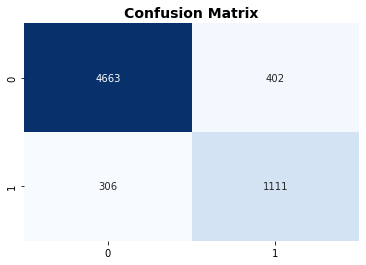



Evaluating Performance for LogisticRegression() 

Accuracy: 0.865
Precision: 0.763
Recall: 0.555
F1 Score: 0.642


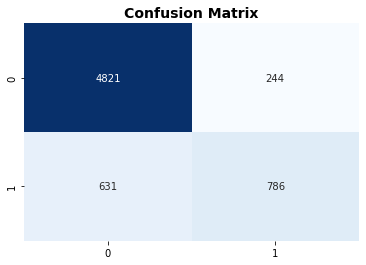



Evaluating Performance for AdaBoostClassifier() 

Accuracy: 0.886
Precision: 0.799
Recall: 0.64
F1 Score: 0.711


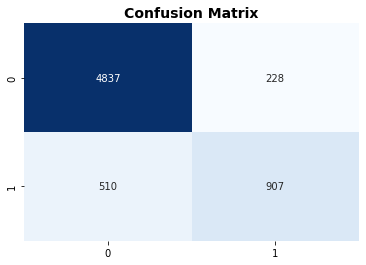



Evaluating Performance for SGDClassifier() 

Accuracy: 0.866
Precision: 0.774
Recall: 0.546
F1 Score: 0.64


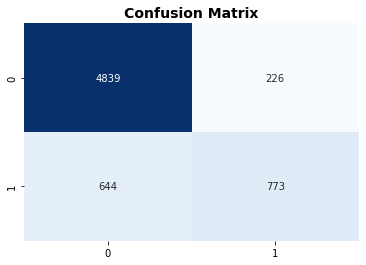



Evaluating Performance for SVC() 

Accuracy: 0.913
Precision: 0.929
Recall: 0.654
F1 Score: 0.768


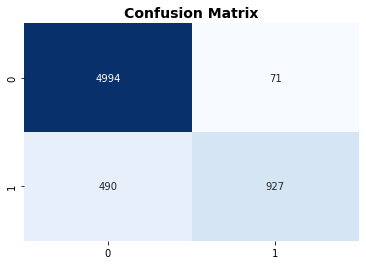



Evaluating Performance for GaussianNB() 

Accuracy: 0.835
Precision: 0.684
Recall: 0.455
F1 Score: 0.547


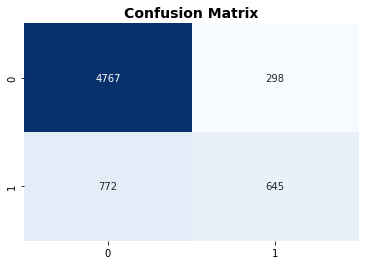



Evaluating Performance for KNeighborsClassifier() 

Accuracy: 0.89
Precision: 0.834
Recall: 0.619
F1 Score: 0.71


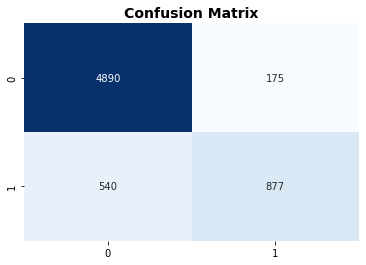

In [38]:
models = [RandomForestClassifier(), DecisionTreeClassifier(), LogisticRegression(), AdaBoostClassifier(), SGDClassifier(), SVC(), GaussianNB(), KNeighborsClassifier()]

evaluate_performance(models)

[Text(0, 0, '0.935'),
 Text(0, 0, '0.891'),
 Text(0, 0, '0.865'),
 Text(0, 0, '0.886'),
 Text(0, 0, '0.866'),
 Text(0, 0, '0.913'),
 Text(0, 0, '0.835'),
 Text(0, 0, '0.89')]

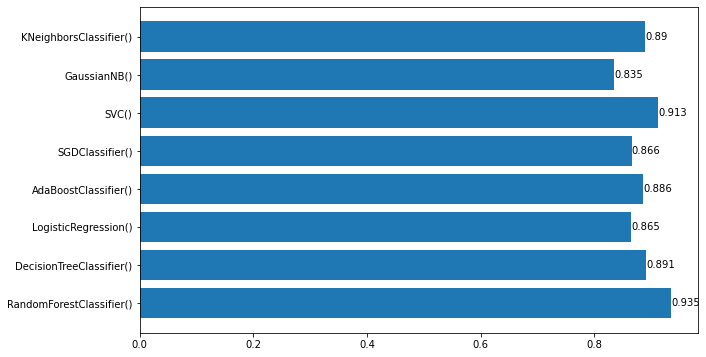

In [69]:
# Plot model accuracy scores in a bar chart

model_scores = pd.DataFrame({'model':models, 'accuracy_score':accuracy_scores})
plt.figure(figsize=(10,6))
positions = range(len(accuracy_scores))
barplot = plt.barh(positions, accuracy_scores)
plt.yticks(positions, models)
plt.bar_label(barplot, labels=accuracy_scores, label_type='edge')

### Hyperparameter Tuning

In [89]:
from sklearn.model_selection import RandomizedSearchCV

In [90]:
# Create a pipeline with transformers and an estimator
pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', RandomForestClassifier())
    ])

In [94]:
# Indicate the combination of hyperparameter values to consider during random search

param_vals = {'model__max_depth': [200, 500, 600, 800, 1100, 1300], 'model__n_estimators': [100, 200, 300, 400,500]}

In [95]:
# Create instance of RandomizedSearchCV with desired parameters

random_rf = RandomizedSearchCV(estimator=pipe, param_distributions=param_vals,
                              n_iter=10, scoring='accuracy', cv=5,
                              refit=True, n_jobs=-1)

In [96]:
# Training and prediction

random_rf.fit(X_train, y_train)
preds = random_rf.best_estimator_.predict(X_test)

In [97]:
print(" Results from Random Search " )
# print("\n The best estimator across ALL searched params:\n", random_rf.best_estimator_)
print("\n The best score across ALL searched params:\n", random_rf.best_score_)
print("\n The best parameters across ALL searched params:\n", random_rf.best_params_)

 Results from Random Search 

 The best score across ALL searched params:
 0.9307671235627705

 The best parameters across ALL searched params:
 {'model__n_estimators': 400, 'model__max_depth': 800}


In [110]:
# Check feature importances
final_model = RandomForestClassifier(n_estimators=400, max_depth=800)
final_model.fit(X_train_transformed, y_train)
final_model.feature_importances_

array([0.04887123, 0.15124984, 0.06093027, 0.07911258, 0.11690456,
       0.22058495, 0.03773592, 0.00088959, 0.01696475, 0.07746342,
       0.01532267, 0.01594523, 0.01523541, 0.01309068, 0.01227071,
       0.00464689, 0.01521914, 0.05980791, 0.0174155 , 0.00490173,
       0.00238089, 0.01305613])

[Text(0, 0, '0.049'),
 Text(0, 0, '0.151'),
 Text(0, 0, '0.061'),
 Text(0, 0, '0.079'),
 Text(0, 0, '0.117'),
 Text(0, 0, '0.221'),
 Text(0, 0, '0.038'),
 Text(0, 0, '0.001'),
 Text(0, 0, '0.017'),
 Text(0, 0, '0.077'),
 Text(0, 0, '0.015'),
 Text(0, 0, '0.016'),
 Text(0, 0, '0.015'),
 Text(0, 0, '0.013'),
 Text(0, 0, '0.012'),
 Text(0, 0, '0.005'),
 Text(0, 0, '0.015'),
 Text(0, 0, '0.06'),
 Text(0, 0, '0.017'),
 Text(0, 0, '0.005'),
 Text(0, 0, '0.002'),
 Text(0, 0, '0.013')]

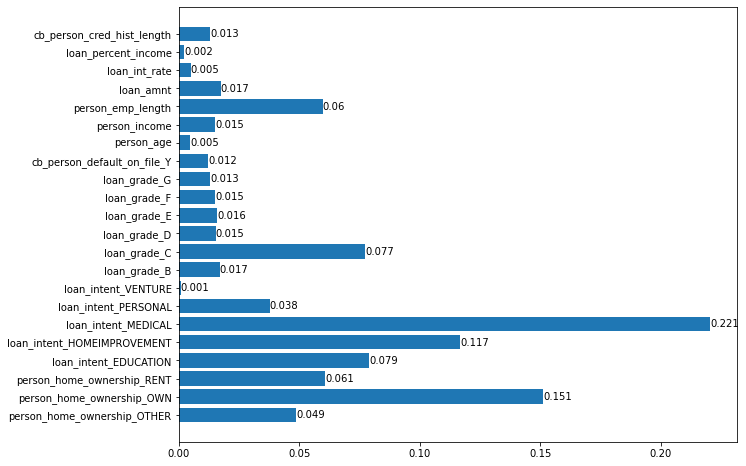

In [143]:
# Plot feature importances

plt.figure(figsize=(10,8))
fi_plot = plt.barh(columns, final_model.feature_importances_)
plt.bar_label(fi_plot, labels=np.round(final_model.feature_importances_,3), label_type='edge')